In [1]:
import sys

sys.path.append("C:\\Users\\Gabija\\anaconda3\\Lib\\site-packages")
import nb_black

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import cv2
import glob
import os
import shutil
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torchvision import transforms, datasets

<IPython.core.display.Javascript object>

# Sprint 1: Computer Vision
# Know Your Mushrooms

The aim of this work is to develop a model to help identify a variety of mushrooms.

The idea of this project is to use transfer learning on an architecture of our choice and fine-tune it to achieve the best results.

I will use this Kaggle dataset https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images

As my model I choose ResNet18. It is a convolutional neural network that is 18 layers deep.
The pretrained version of the network trained on more than a million images from the ImageNet database. 
The pretrained network can classify images into 1000 object categories.

* Getting initial dataset all 9 folders:

In [4]:
folders = glob.glob("Mushrooms\\*")
folders

['Mushrooms\\Amanita',
 'Mushrooms\\Boletus',
 'Mushrooms\\Cortinarius',
 'Mushrooms\\Entoloma',
 'Mushrooms\\Hygrocybe',
 'Mushrooms\\Lactarius',
 'Mushrooms\\Mushrooms',
 'Mushrooms\\Russula',
 'Mushrooms\\Suillus']

<IPython.core.display.Javascript object>

* First view on our dataset shows subfolder "Mushrooms" that also contains subfolders with images, so I will concatenate images that are under the same name file.

In [5]:
root_dir = "Mushrooms"
root_subfolders = [
    "Amanita",
    "Boletus",
    "Cortinarius",
    "Entoloma",
    "Hygrocybe",
    "Lactarius",
    "Mushrooms",
    "Russula",
    "Suillus",
]
mushrooms_subfolders = [
    "Agaricus",
    "Amanita",
    "Boletus",
    "Cortinarius",
    "Entoloma",
    "Hygrocybe",
    "Lactarius",
    "Russula",
    "Suillus",
]

for subfolder in mushrooms_subfolders:
    if subfolder in root_subfolders:
        src = os.path.join(root_dir, "Mushrooms", subfolder)
        dst = os.path.join(root_dir, subfolder)
        for filename in os.listdir(src):
            shutil.move(os.path.join(src, filename), os.path.join(dst, filename))

    else:
        src = os.path.join(root_dir, "Mushrooms", subfolder)
        dst = os.path.join(root_dir, subfolder)
        shutil.move(src, dst)

shutil.rmtree(os.path.join(root_dir, "Mushrooms"))

<IPython.core.display.Javascript object>

In [7]:
root_dir = glob.glob("Mushrooms\\*")
root_dir

['Mushrooms\\Agaricus',
 'Mushrooms\\Amanita',
 'Mushrooms\\Boletus',
 'Mushrooms\\Cortinarius',
 'Mushrooms\\Entoloma',
 'Mushrooms\\Hygrocybe',
 'Mushrooms\\Lactarius',
 'Mushrooms\\Russula',
 'Mushrooms\\Suillus']

<IPython.core.display.Javascript object>

* Checking how many image formats are there in this dataset:

In [16]:
image_formats = set()
for root, dirs, files in os.walk(root_dir):
    for file in files:
        _, extension = os.path.splitext(file)
        image_formats.add(extension.lower())

print("Image formats in the dataset:", image_formats)

Image formats in the dataset: {'.jpg'}


<IPython.core.display.Javascript object>

* Analysing image dimensions with creation of images shape dataframe:

In [8]:
imagenames_list = []
for folder in root_dir:
    for f in glob.glob(folder + "/*.jpg"):
        imagenames_list.append(f)
read_images = []
for image in imagenames_list:
    read_images.append(np.asarray(cv2.imread(image).shape))

shape_df = pd.DataFrame(read_images, columns=["width", "height", "channel"])
shape_df.head(15)

,width,height,channel
0,600,778,3
1,525,700,3
2,524,700,3
3,600,800,3
4,563,750,3
5,539,800,3
6,600,800,3
7,600,771,3
8,600,800,3
9,600,800,3


<IPython.core.display.Javascript object>

The describtion of images:
- there are 6714 images in the dataset;
- all images are 3 channel (channels is usually 3 for RGB or 1 if it’s greyscale);
- images are not of the same size: some are very big (max), some are taller then others. That means for future modelling I will need to unify size.

In [11]:
shape_df.describe()

,width,height,channel
count,6714.000000,6714.000000,6714.0
mean,579.812332,796.176795,3.0
std,100.118028,132.803124,0.0
min,152.000000,259.000000,3.0
25%,533.000000,800.000000,3.0
50%,580.000000,800.000000,3.0
75%,600.000000,800.000000,3.0
max,1024.000000,1280.000000,3.0


<IPython.core.display.Javascript object>

* Plotting the images distribution to visualize the description:

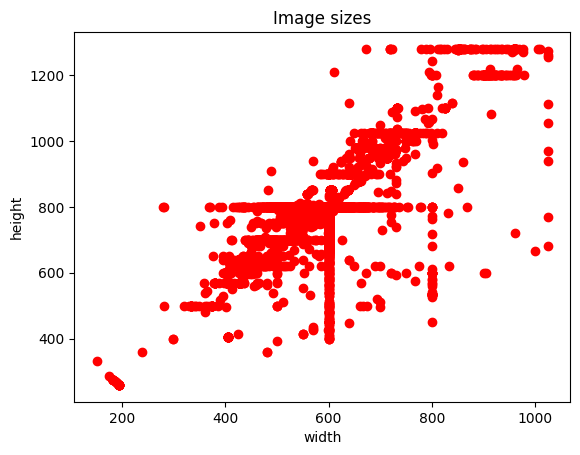

<IPython.core.display.Javascript object>

In [9]:
plt.plot(shape_df["width"], shape_df["height"], "ro")
plt.title("Image sizes")
plt.xlabel("width")
plt.ylabel("height")
plt.show()

In [25]:
root_dir = "Mushrooms"
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]
)
dataset = datasets.ImageFolder(root=root_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

<IPython.core.display.Javascript object>

* Plot random mushrooms as example:

Image path: Mushrooms\Boletus\0430_EfZRbD-1yAI.jpg
(633, 950, 3)
Image path: Mushrooms\Suillus\004_LMWP6X0bx7g.jpg
(600, 800, 3)
Image path: Mushrooms\Amanita\426_lisuxvCVhdc.jpg
(600, 800, 3)
Image path: Mushrooms\Lactarius\261_Qny_id7k6fM.jpg
(696, 800, 3)
Image path: Mushrooms\Agaricus\196_45lLGE7jhQQ.jpg
(533, 800, 3)
Image path: Mushrooms\Russula\114_daOU0_YzRKU.jpg
(531, 800, 3)
Image path: Mushrooms\Russula\343_ToPg8t01A-I.jpg
(585, 780, 3)
Image path: Mushrooms\Lactarius\0113_12E_YH7bGzQ.jpg
(600, 800, 3)
Image path: Mushrooms\Agaricus\265_l_IPS1uSzag.jpg
(600, 800, 3)
Image path: Mushrooms\Suillus\223_c499R8Mly5k.jpg
(517, 800, 3)
Image path: Mushrooms\Lactarius\1092_-CIaoCjAWz8.jpg
(563, 750, 3)
Image path: Mushrooms\Lactarius\1015_x8NKL72qkvI.jpg
(600, 787, 3)
Image path: Mushrooms\Russula\258_ylBHs7FX_2M.jpg
(600, 800, 3)
Image path: Mushrooms\Russula\186_vHjkFfYTovI.jpg
(521, 800, 3)
Image path: Mushrooms\Agaricus\073_IOmIK6b0R_k.jpg
(533, 800, 3)
Image path: Mushrooms\Bol

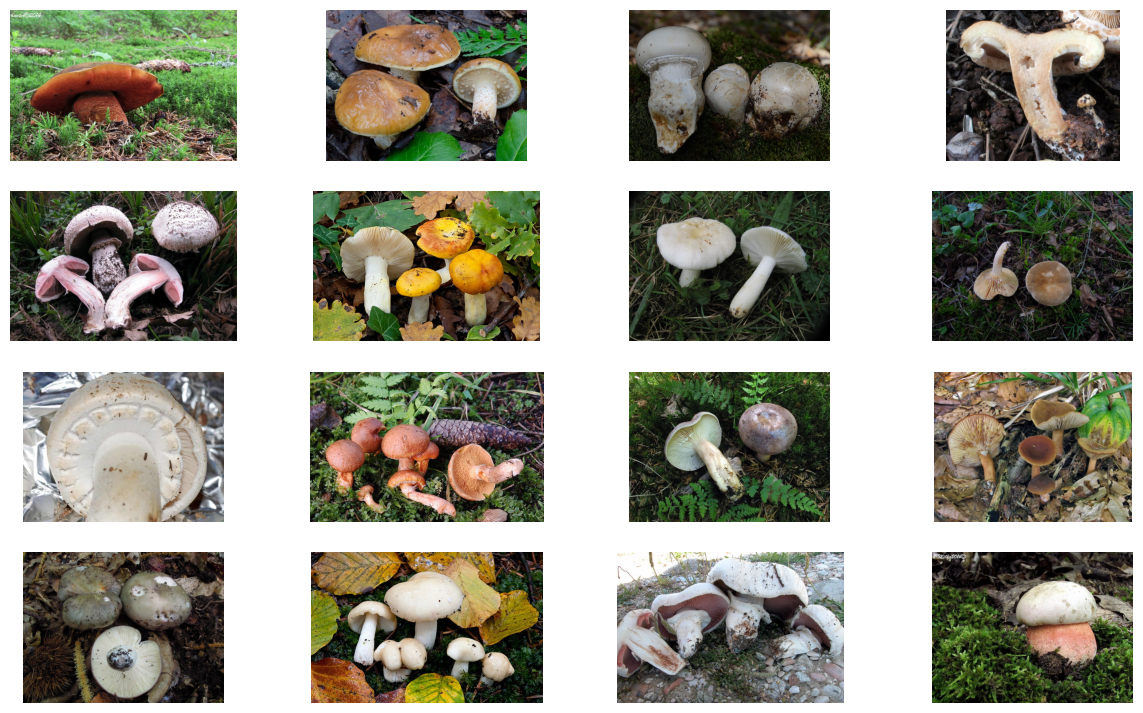

<IPython.core.display.Javascript object>

In [26]:
plt.figure(1, figsize=(15, 9))
n = 0
for i in range(16):
    n += 1
    random_img = random.choice(imagenames_list)
    print(f"Image path: {random_img}")
    imgs = cv2.imread(random_img)
    imgs_rgb = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)

    print(imgs_rgb.shape)
    plt.subplot(4, 4, n)
    plt.axis("off")
    plt.imshow(imgs_rgb)

plt.show()

* We do not have labels for our mushrooms, so we get only photos, not knowing what species it belongs to. So, I will add labels for our images:


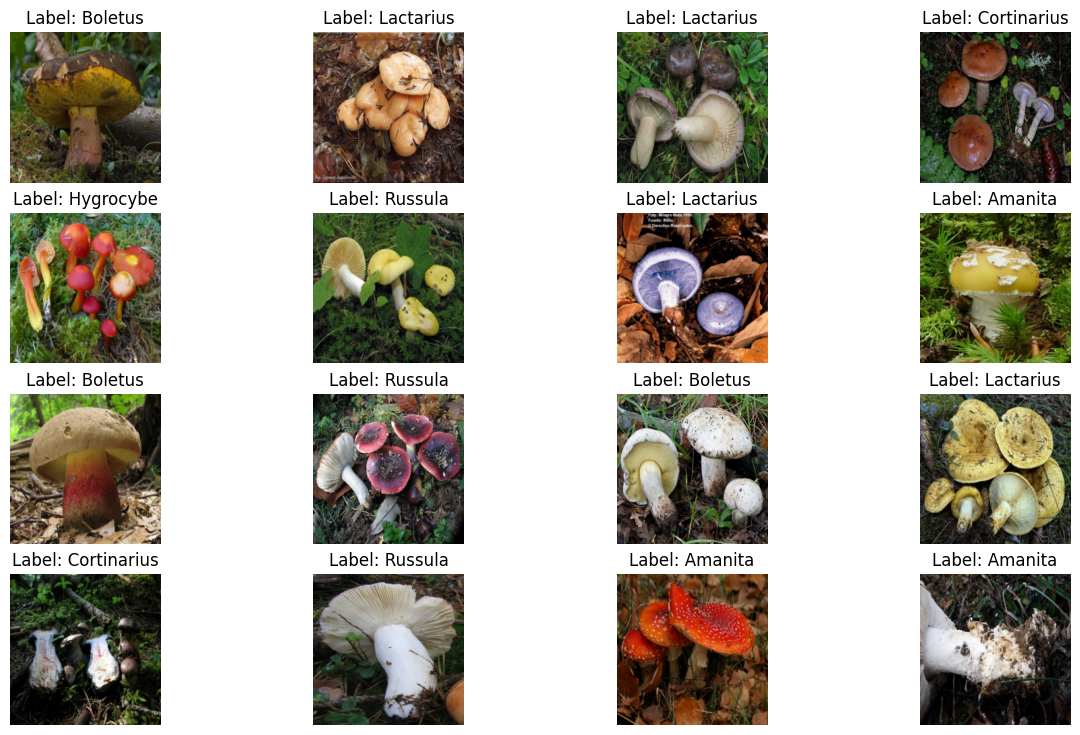

<IPython.core.display.Javascript object>

In [27]:
for batch in dataloader:
    images, labels = batch
    break
plt.figure(figsize=(15, 9))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.title(f"Label: {dataset.classes[labels[i]]}")
    plt.axis("off")
    plt.imshow(images[i].permute(1, 2, 0))
plt.show()

### How many images we have for each species ?:

* We see that biggest 3 groups of images are Lactarius (1563 images), Russula (1148 images) and Boletus (1073 images).

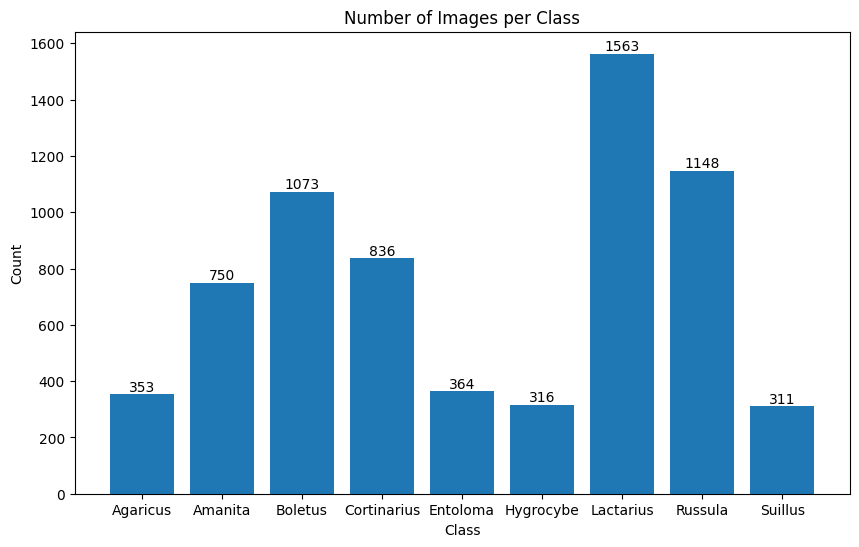

<IPython.core.display.Javascript object>

In [14]:
class_names = dataset.classes
class_counts = [
    len(os.listdir(os.path.join(root_dir, class_name))) for class_name in class_names
]

plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, class_counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Number of Images per Class")
for bar, count in zip(bars, class_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f"{int(count)}",
        ha="center",
        va="bottom",
    )
plt.show()

* For my further work I need to prepare this dataset and split into 3 parts as Train, Validation and Test with ratios: 70%, 15%, 15%.

In [30]:
original_root = "Mushrooms"
new_root = "Mushrooms_split"
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

<IPython.core.display.Javascript object>

In [30]:
if not os.path.exists(new_root):
    os.makedirs(new_root)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root=original_root, transform=transform)


class_names = dataset.classes
class_counts = torch.tensor(dataset.targets).bincount()

<IPython.core.display.Javascript object>

In [31]:
train_root = os.path.join(new_root, "train")
val_root = os.path.join(new_root, "val")
test_root = os.path.join(new_root, "test")

<IPython.core.display.Javascript object>

In [37]:
for root in [train_root, val_root, test_root]:
    if not os.path.exists(root):
        os.makedirs(root)


for class_name, class_count in zip(class_names, class_counts):
    class_folder = os.path.join(original_root, class_name)
    train_size = int(train_ratio * class_count)
    val_size = int(val_ratio * class_count)
    test_size = class_count - train_size - val_size

    for folder in [
        os.path.join(train_root, class_name),
        os.path.join(val_root, class_name),
        os.path.join(test_root, class_name),
    ]:
        if not os.path.exists(folder):
            os.makedirs(folder)


    class_images = os.listdir(class_folder)
    random.shuffle(class_images)


    train_images = class_images[:train_size]
    val_images = class_images[train_size : train_size + val_size]
    test_images = class_images[train_size + val_size :]

    for img_name in train_images:
        shutil.copy(
            os.path.join(class_folder, img_name),
            os.path.join(train_root, class_name, img_name),
        )

    for img_name in val_images:
        shutil.copy(
            os.path.join(class_folder, img_name),
            os.path.join(val_root, class_name, img_name),
        )

    for img_name in test_images:
        shutil.copy(
            os.path.join(class_folder, img_name),
            os.path.join(test_root, class_name, img_name),
        )

<IPython.core.display.Javascript object>

In [32]:
train_count = sum([len(files) for _, _, files in os.walk(train_root)])

val_count = sum([len(files) for _, _, files in os.walk(val_root)])

test_count = sum([len(files) for _, _, files in os.walk(test_root)])

# Print the counts
print(f"Train set size: {train_count} images")
print(f"Validation set size: {val_count} images")
print(f"Test set size: {test_count} images")

Train set size: 4697 images
Validation set size: 1002 images
Test set size: 1015 images


<IPython.core.display.Javascript object>

#### Conclusion:
- Our work is based on 6,714 images that identify 9 mushrooms families;
- The images are not of the same size, which will require their unification for further work;
- For further work, the data is divided into 3 parts: train, validation, test.
    
Prediction part is done on file mushroom_model.ipynb